In [138]:
import numpy as np
import os
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import scipy
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
import tensorflow as tf
print('TensorFlow version:', tf.__version__)

TensorFlow version: 2.13.0


**Exploring Dataset**

In [139]:
images=glob("train/**/**")

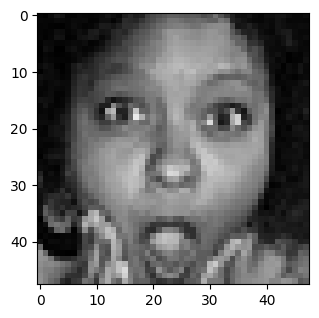

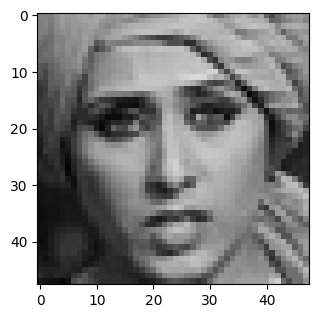

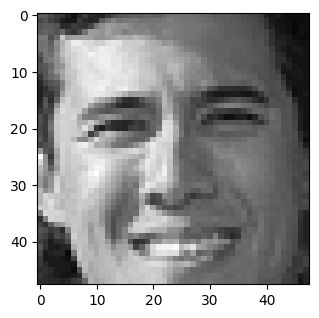

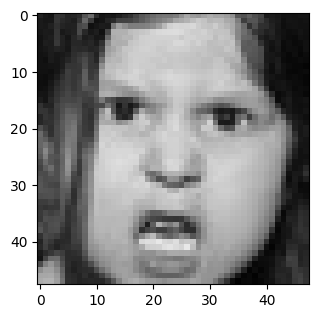

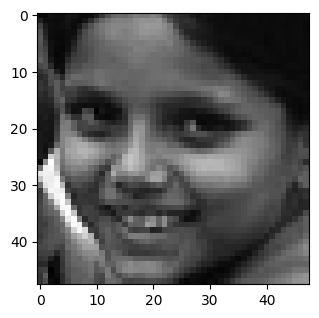

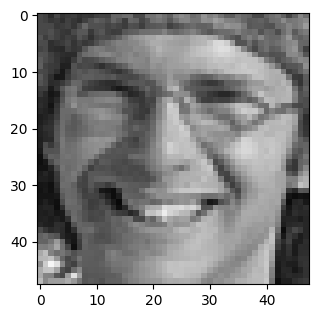

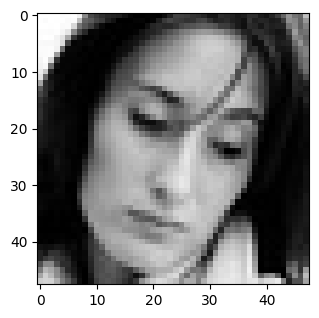

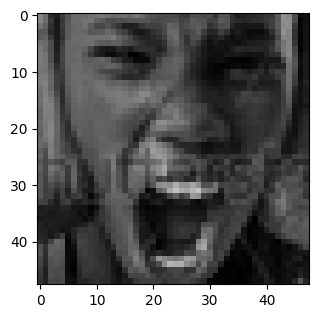

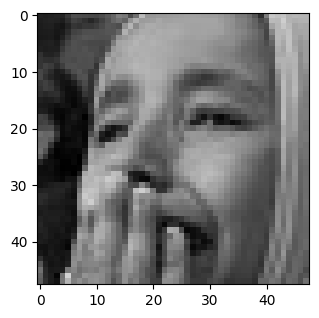

In [140]:
for i in range(9):
    image=random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image))
    # plt.axis('off')

In [141]:
img_size=48
batch_size=64
datagen_train=ImageDataGenerator()
train_generator=datagen_train.flow_from_directory("train/",target_size=(img_size,img_size),color_mode="grayscale",batch_size=batch_size,class_mode='categorical',shuffle=True)
datagen_validation=ImageDataGenerator()
validation_generator=datagen_train.flow_from_directory("test/",target_size=(img_size,img_size),color_mode="grayscale",batch_size=batch_size,class_mode='categorical',shuffle=True)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [142]:
def Convolution(input_tensor,filters,kernel_size):
    x=Conv2D(filters=filters,kernel_size=kernel_size,padding='same')(input_tensor)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    x=MaxPooling2D(pool_size=(2,2))(x)
    x=Dropout(0.25)(x)

    return x

In [143]:
def Dense_f(input_tensor,nodes):
    x=Dense(nodes)(input_tensor)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    x=Dropout(0.25)(x)
    return x


In [144]:
def model_fer(input_shape):
    inputs=Input(input_shape)
    conv1=Convolution(inputs,32,(3,3))
    conv2=Convolution(inputs,64,(5,5))
    conv3=Convolution(inputs,128,(3,3))
    flatten=Flatten()(conv3)
    dense1=Dense_f(flatten,256)
    output=Dense(7,activation='softmax')(dense1)
    model=Model(inputs=[inputs],outputs=[output])
    model.compile(loss=['cateogorical_crossentropy'],optimizer='adam',metrics=['accuracy'])
    return model




In [145]:
model=model_fer((48,48,1))
model.summary()



Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_62 (Conv2D)          (None, 48, 48, 128)       1280      
                                                                 
 batch_normalization_82 (Ba  (None, 48, 48, 128)       512       
 tchNormalization)                                               
                                                                 
 activation_82 (Activation)  (None, 48, 48, 128)       0         
                                                                 
 max_pooling2d_69 (MaxPooli  (None, 24, 24, 128)       0         
 ng2D)                                                           
                                                                 
 dropout_75 (Dropout)        (None, 24, 24, 128)       0  

Initialsing the model

In [146]:
epochs=15
steps_per_epoch=train_generator.n//train_generator.batch_size
validation_steps=validation_generator.n//validation_generator.batch_size
checkpoint=ModelCheckpoint("model_weights.h5",monitor='val_accuracy',save_weights_only=True,mode='max',verbose=1)
callbacks=[checkpoint]



Training the model

In [147]:
history=model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=callbacks)

NameError: name 'scipy' is not defined

In [148]:
model.evaluate(validation_generator)

NameError: name 'scipy' is not defined